In [1]:
# Importando as dependências
from QKDnet.components import Network, Controller
from QKDnet.sim import Simulation
from QKDnet.utils import Logger

# Ativar os logs:
# Logger.activate(Logger)

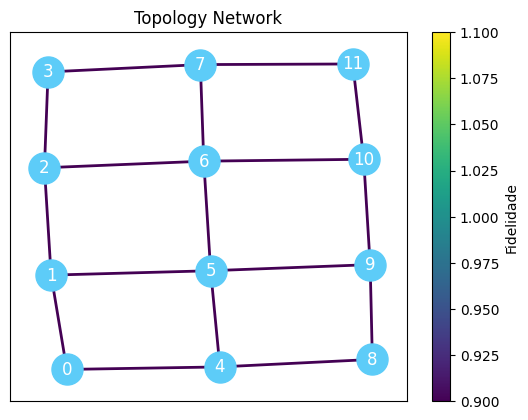

In [2]:
# Rede
rede = Network()
rede.set_topology("Lattice", 3,4)
rede.set_nqubits(100)
rede.draw()
# Controlador
controlador = Controller(rede)

In [3]:
# Parâmetros da simulação
n_requests = 1000
capabilities = [1, 2, 3, 4, 5, 10, 15, 20, 25, 50, 100, 200, 300, 500, 1000]
apps_distribution = [0.33, 0.33, 0.33]
max_time_request = 100
simulation_case = 1

In [4]:
# Ordenador de requests
controlador.set_sorter('urgency')

# Simulações
simulations = []

for c in capabilities:
    # Rede
    rede = Network()
    rede.set_topology("Lattice", 3,4)
    rede.set_nqubits(100)
    # Controlador
    controlador = Controller(rede)
    sim = Simulation(rede, controlador)
    sim.set_case(simulation_case)
    sim.set_apps_distribution(apps_distribution)
    sim.set_max_time_request(max_time_request)
    sim.set_n_requests(n_requests)
    # Alterando a capacidade
    sim.network.set_capacity(c)
    # Rodando a simulação
    sim.run()
    # Guardando a simulação
    simulations.append(sim)
    print(len(sim.controller.data_base.served_requests))
    print(sim.controller.data_base.final_time)
    print('ok')

42
101
ok
95
101
ok
146
101
ok
230
101
ok
323
101
ok
884
101
ok
1000
73
ok
1000
63
ok
1000
62
ok
1000
62
ok
1000
64
ok
1000
62
ok
1000
65
ok
1000
63
ok
1000
64
ok


In [5]:
def float_to_string(n):
    # Convertendo o número float para string e dividindo em parte inteira e decimal
    str_number = str(n)
    integer_part, decimal_part = str_number.split('.')
    # Concatenando a parte inteira com a vírgula e a parte decimal
    result_string = f"{integer_part},{decimal_part}" 
    return result_string

In [6]:
for simulation in simulations:
    print(float_to_string(simulation.throughput))


0,4158415841584158
0,9405940594059405
1,4455445544554455
2,277227722772277
3,198019801980198
8,752475247524753
13,698630136986301
15,873015873015873
16,129032258064516
16,129032258064516
15,625
16,129032258064516
15,384615384615385
15,873015873015873
15,625
